In [313]:
import numpy as np
import pandas  as pd

In [314]:
freq = pd.read_csv('./freq_kindergarten.csv',thousands=',', encoding = 'euc-kr')
freq.head()

,구,유치원명
0,강남구,40
1,강동구,38
2,강북구,24
3,강서구,59
4,관악구,39


In [315]:
people = pd.read_csv('./서울시_행정_인구_수정).csv',thousands=',', encoding = 'euc-kr')
people.head() 

,자치구,동,0~4세,5~9세
0,강동구,강일동,"1,848",1945
1,강동구,상일동,"2,075",2918
2,강동구,명일동,959,1161
3,강동구,명일동,310,838
4,강동구,고덕동,976,1955


In [316]:
y = []
for x in people['0~4세']:
    z = x.replace(",","")
    y.append(z)
print(y)
people['0~4세'] =  y

['1848', '2075', '959', '310', '976', '1149', '737', '716', '664', '672', '713', '547', '625', '-', '743', '965', '894', '1111', '21188', '356', '889', '275', '598', '349', '374', '413', '642', '335', '1329', '615', '636', '786', '697', '834', '1456', '983', '645', '777', '656', '932', '607', '239', '1209', '1189', '1120', '2247', '13307', '371', '347', '484', '355', '872', '402', '266', '490', '1017', '605', '942', '112', '742', '659', '299', '504', '369', '1507', '798', '843', '586', '737', '12857', '595', '839', '821', '988', '759', '206', '1026', '578', '788', '727', '469', '513', '545', '565', '640', '1432', '633', '733', '9707', '519', '615', '558', '294', '193', '505', '443', '338', '259', '344', '447', '203', '469', '319', '322', '844', '799', '616', '560', '349', '711', '10764', '166', '1175', '1159', '593', '744', '393', '927', '362', '528', '791', '612', '556', '1025', '868', '865', '13239', '1188', '624', '1400', '683', '867', '329', '597', '422', '427', '570', '955', '547'

In [317]:
y = []
for x in people['0~4세']:
    z = x.replace("-","0")
    y.append(z)
print(y)
people['0~4세'] =  y


['1848', '2075', '959', '310', '976', '1149', '737', '716', '664', '672', '713', '547', '625', '0', '743', '965', '894', '1111', '21188', '356', '889', '275', '598', '349', '374', '413', '642', '335', '1329', '615', '636', '786', '697', '834', '1456', '983', '645', '777', '656', '932', '607', '239', '1209', '1189', '1120', '2247', '13307', '371', '347', '484', '355', '872', '402', '266', '490', '1017', '605', '942', '112', '742', '659', '299', '504', '369', '1507', '798', '843', '586', '737', '12857', '595', '839', '821', '988', '759', '206', '1026', '578', '788', '727', '469', '513', '545', '565', '640', '1432', '633', '733', '9707', '519', '615', '558', '294', '193', '505', '443', '338', '259', '344', '447', '203', '469', '319', '322', '844', '799', '616', '560', '349', '711', '10764', '166', '1175', '1159', '593', '744', '393', '927', '362', '528', '791', '612', '556', '1025', '868', '865', '13239', '1188', '624', '1400', '683', '867', '329', '597', '422', '427', '570', '955', '547'

In [318]:
people['0~4세'] = people['0~4세'].astype(int)

In [319]:
freq_people = people.groupby(['자치구']).sum()

In [320]:
freq_people2 = freq_people.reset_index()

In [321]:
freq_people2

,자치구,0~4세,5~9세
0,강남구,26614,45982
1,강동구,15704,20011
2,강북구,12756,17934
3,강서구,34096,43928
4,관악구,19414,24866
5,광진구,16534,22516
6,구로구,26300,31778
7,금천구,12080,14440
8,노원구,26108,38800
9,도봉구,15064,21384


In [322]:
freq_people['영유아인구수'] = freq_people['0~4세'] + freq_people['5~9세']

In [323]:
freq_people2 = freq_people.reset_index()

In [326]:
freq = freq.rename(columns={'구':'자치구'})

In [327]:
people_kin = pd.merge(freq_people2, freq, on = '자치구', how = 'left')

In [328]:
people_kin

,자치구,0~4세,5~9세,영유아인구수,유치원명
0,강남구,26614,45982,72596,40
1,강동구,15704,20011,35715,38
2,강북구,12756,17934,30690,24
3,강서구,34096,43928,78024,59
4,관악구,19414,24866,44280,39
5,광진구,16534,22516,39050,38
6,구로구,26300,31778,58078,35
7,금천구,12080,14440,26520,19
8,노원구,26108,38800,64908,73
9,도봉구,15064,21384,36448,33


In [329]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_fname = 'C:\\Users\\qazpl\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

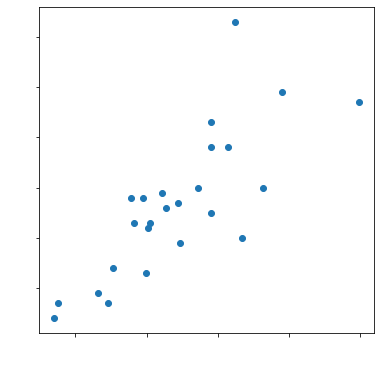

In [330]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(6,6))
plt.scatter(people_kin['영유아인구수'], people_kin['유치원명'])
plt.xlabel('영유아인구수',color='white')
plt.ylabel('유치원 수',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [331]:
fp1 = np.polyfit(people_kin['영유아인구수'], people_kin['유치원명'],1)
fp1

array([5.71233605e-04, 8.84013085e+00])

In [332]:
f1 = np.poly1d(fp1)

In [333]:
fx = np.linspace(100000, 100)

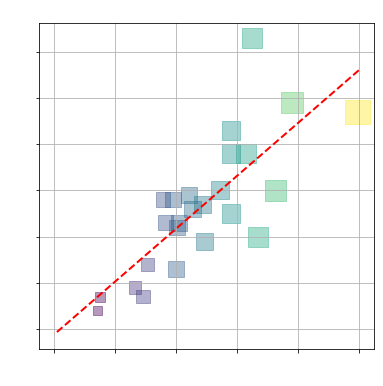

In [334]:
plt.figure(figsize=(6,6))
plt.scatter(people_kin['영유아인구수'], people_kin['유치원명'], c=people_kin.영유아인구수,
            s=0.006*people_kin.영유아인구수, # 마커크기
            alpha=0.4, # 마커투명도 
            cmap='viridis', marker = 's') # 마커색깔, 모양
plt.plot(fx, f1(fx), ls='dashed', lw=2, color='r') # 추세선 두께, 색깔
plt.xlabel('영유아인구수',color='white')
plt.ylabel('유치원 수',color='white') 
plt.xticks(color='white') # x축글자색
plt.yticks(color='white') # y축글자색
plt.grid()
plt.title('영유아인구수와 유치원 수의 상관관계', fontsize=14, color = "white") # 제목, 글자크기, 글자색

plt.show()

In [335]:
np.corrcoef(people_kin['영유아인구수'], people_kin['유치원명'])

array([[1.        , 0.78667948],
       [0.78667948, 1.        ]])

In [336]:
people_kin

,자치구,0~4세,5~9세,영유아인구수,유치원명
0,강남구,26614,45982,72596,40
1,강동구,15704,20011,35715,38
2,강북구,12756,17934,30690,24
3,강서구,34096,43928,78024,59
4,관악구,19414,24866,44280,39
5,광진구,16534,22516,39050,38
6,구로구,26300,31778,58078,35
7,금천구,12080,14440,26520,19
8,노원구,26108,38800,64908,73
9,도봉구,15064,21384,36448,33
